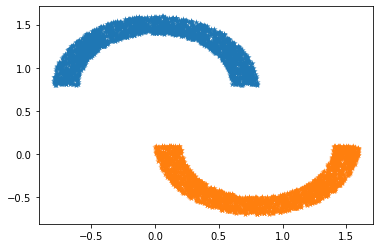

In [140]:
import numpy as np
n_data_points = 2000

rad = 0.6
thk = 0.2
sep = 0.1
c1 = np.array([(rad+thk), sep])
c2 = np.array([(rad+thk), -sep])
r1 = np.random.rand(n_data_points)*thk+rad
a1 = np.random.rand(n_data_points)*np.pi

r2 = np.random.rand(n_data_points)*thk+rad
a2 = np.random.rand(n_data_points)*np.pi+np.pi

# In order to plot it we convert it to cartesian:
p1 = np.array((r1*np.cos(a1), r1*np.sin(a1)))
p2 = np.array((r2*np.cos(a2), r2*np.sin(a2)))
x1, y1 = (p1[0], p1[1]+c1[0] )
x2, y2 = (p2[0] + c2[0], p2[1] - c2[1])
import matplotlib.pyplot as plt
plt.scatter(x1, y1, marker='*', linewidths=0.1)
plt.scatter(x2, y2, marker='*', linewidths=0.1)
plt.show()

In [141]:
class Perceptron:
    def init(self):
        self.p_w = None
        self.w= None
        self.epoch=0
        
    def model(self,x):
        y=np.dot(self.w,x.transpose())
        return 1 if y>=0 else 0
        
    def fit(self,X,Y):
        self.p_w = np.ones(X.shape[1]+1)
        self.w = np.zeros(X.shape[1]+1)
        self.epoch =0
        while np.any(abs(self.p_w-self.w)>0.2):
            self.epoch+=1
            self.p_w = self.w
            '''y_pred_in=self.predict(X)
            n=self.no_of_misclassified_points(Y,y_pred_in)
            if n<20: 
                break
            if self.epoch>10:
                 break'''
            for x,y in zip(X,Y):
                x=np.insert(x,0,1)
                y_pred=self.model(x)
                self.w=self.w-(y_pred-y)*x
            
    def predict(self,X):
        Y=[]
        for x in X:
            x=np.insert(x,0,1)
            Y.append(self.model(x))
        return np.array(Y)
    
    def no_of_misclassified_points(self,Y_actual,Y_pred):
        n=0
        for y_actual,y_pred in zip(Y_actual,Y_pred):
            if y_actual!=y_pred:
                n=n+1
        return n
    
        
        
                
        

In [158]:
X=[]
for x,y in zip(x1,y1):
    i=[]
    i.append(x)
    i.append(y)
    i.append(1)
    X.append(i)
for x,y in zip(x2,y2):
    i=[]
    i.append(x)
    i.append(y)
    i.append(0)
    X.append(i)
X=np.array(X)
Y=X[:,-1]
Y=Y.astype(int)
print(Y)
X=X[:,:-1]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


pt = Perceptron()
pt.fit(X_train,Y_train)


[1 1 1 ... 0 0 0]


In [159]:
Y_pred=pt.predict(X_test)


In [160]:
print(pt.no_of_misclassified_points(Y_test,Y_pred))
print(pt.epoch)

0
2


In [161]:
Y_test.shape

(1320,)

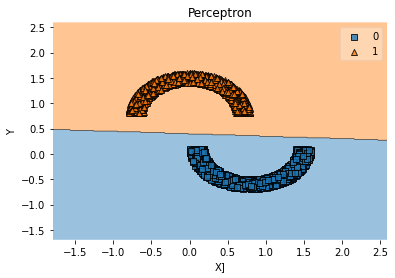

In [162]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y, clf=pt)
plt.title('Perceptron')
plt.xlabel('X]')
plt.ylabel('Y')
plt.show()